# 多标签分类任务

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

class Flatten(torch.nn.Module):
    def forward(self, input):
        return input.view(input.size(0), -1)
    
num_of_feature = 11

In [2]:
# model = torch.nn.Sequential(
#     torch.nn.Linear(13, 64),
#     torch.nn.LeakyReLU(),
#     torch.nn.Linear(64, 32),
#     torch.nn.LeakyReLU(),
#     torch.nn.Linear(32, 2),
# )

model = torch.nn.Sequential(
    torch.nn.Conv1d(1, 64, 3, 1), #11
    torch.nn.Tanh(),
    torch.nn.Conv1d(64, 128, 3, 1), #9
    torch.nn.Tanh(),
    Flatten(),
    torch.nn.Linear(128*(num_of_feature-4), 2)
#     torch.nn.Linear(128, 2)
#     torch.nn.Linear(576, 2)
    )

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [3]:
def train(batch, epoch, dataset):
    x_train = np.load('data/x_train_11.npy') #420
    x_val = np.load('data/x_val_11.npy')     #91
    x_test = np.load('data/x_test_11.npy')   #90
    y_train = np.load('data/y_train_' + dataset + '_11.npy')
    y_val = np.load('data/y_val_' + dataset + '_11.npy')
    y_test = np.load('data/y_test_' + dataset + '_11.npy')
    x_train = np.expand_dims(x_train, axis=1)
    x_val = np.expand_dims(x_val, axis=1)
    x_test = np.expand_dims(x_test, axis=1)
    data_pred = np.load('data/for_pred_11.npy')
    data_pred = np.expand_dims(data_pred, axis=1)
    indicies = np.arange(x_train.shape[0])
    epoch_loss = []
    epoch_accuracy = []
    val_accuracy = []
    test_accuracy = []
    IM_accuracy = []
    data_pred_labels = []
    for e in range(epoch):
        losses = []
        accuracies = []
        for i in range(0, int(np.ceil(x_train.shape[0]/batch))):
            start_idx = (i * batch) % x_train.shape[0]
            idx = indicies[start_idx: start_idx + batch]
            x_in = torch.from_numpy(x_train[idx]).type(torch.float32)
            y_in = torch.from_numpy(y_train[idx]).type(torch.long)
            y_score = model(x_in)
            predict = torch.argmax(y_score, 1)
            difference = predict == y_in
            accuracy = torch.mean(difference.type(torch.float32))
            loss = torch.nn.CrossEntropyLoss()
            loss = loss(y_score, y_in)
#             print('loss: ', loss.item(),' accuracy: ', accuracy.item())
            losses.append(loss.item())
            accuracies.append(accuracy.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        print('epoch ', e, ' with loss: %.4f' %np.mean(losses), ' and accuracy: %.4f' %np.mean(accuracies))
        epoch_loss.append(np.mean(losses))
        epoch_accuracy.append(np.mean(accuracies))
        
        x_val_in = torch.from_numpy(x_val).type(torch.float32)
        y_val_in = torch.from_numpy(y_val).type(torch.long)
        y_val_score = model(x_val_in)
        val_predict = torch.argmax(y_val_score, 1) == y_val_in
        val_acc = torch.mean(val_predict.type(torch.float32))
        val_accuracy.append(val_acc.item())
        
        x_test_in = torch.from_numpy(x_test).type(torch.float32)
        y_test_in = torch.from_numpy(y_test).type(torch.long)
        y_test_score = model(x_test_in)
        test_predict = torch.argmax(y_test_score, 1) == y_test_in
        test_acc = torch.mean(test_predict.type(torch.float32))
        test_accuracy.append(test_acc.item())
        
        data_pred_in = torch.from_numpy(data_pred).type(torch.float32)
        data_pred_score = model(data_pred_in)
        data_pred_label = torch.argmax(data_pred_score, 1)
        data_pred_labels.append(data_pred_label)
        
        print('epoch ', e, ' with val_accuracy: %.4f' %val_acc.item(), ' and test_accuracy: %.4f' %test_acc.item())
    
    print('Highest val accuracy: %.4f' %np.max(val_accuracy), ' and test accuracy: %.4f' %np.max(test_accuracy))
    plt.xlabel('epoch')
    plt.ylabel('Loss')
    plt.plot(epoch_loss[10:])
    plt.grid(True)
    plt.show()
    plt.xlabel('epoch')
    plt.ylabel('Accuracy')
    plt.plot(epoch_accuracy)
    plt.grid(True)
    plt.show()
    return data_pred_labels

同样的特征x_train，不同的标签，但是还是用同样结构的模型去训练。

<b>从这里可以看出，这个模型的作用是通过传入SS、AM、IM对应的label来训练相应的模型，来预测未知的对应三个种类的标签

epoch  0  with loss: 0.2643  and accuracy: 0.8786
epoch  0  with val_accuracy: 0.9780  and test_accuracy: 0.9333
epoch  1  with loss: 0.1539  and accuracy: 0.9595
epoch  1  with val_accuracy: 0.9780  and test_accuracy: 0.9222
epoch  2  with loss: 0.1658  and accuracy: 0.9524
epoch  2  with val_accuracy: 0.9670  and test_accuracy: 0.9444
epoch  3  with loss: 0.1544  and accuracy: 0.9548
epoch  3  with val_accuracy: 0.9670  and test_accuracy: 0.9444
epoch  4  with loss: 0.1499  and accuracy: 0.9524
epoch  4  with val_accuracy: 0.9780  and test_accuracy: 0.9444
epoch  5  with loss: 0.1480  and accuracy: 0.9500
epoch  5  with val_accuracy: 0.9780  and test_accuracy: 0.9444
epoch  6  with loss: 0.1467  and accuracy: 0.9500
epoch  6  with val_accuracy: 0.9780  and test_accuracy: 0.9444
epoch  7  with loss: 0.1445  and accuracy: 0.9500
epoch  7  with val_accuracy: 0.9780  and test_accuracy: 0.9444
epoch  8  with loss: 0.1423  and accuracy: 0.9500
epoch  8  with val_accuracy: 0.9780  and test_

epoch  73  with loss: 0.0482  and accuracy: 0.9810
epoch  73  with val_accuracy: 0.9890  and test_accuracy: 0.9667
epoch  74  with loss: 0.0473  and accuracy: 0.9810
epoch  74  with val_accuracy: 0.9890  and test_accuracy: 0.9667
epoch  75  with loss: 0.0465  and accuracy: 0.9810
epoch  75  with val_accuracy: 0.9890  and test_accuracy: 0.9667
epoch  76  with loss: 0.0457  and accuracy: 0.9810
epoch  76  with val_accuracy: 0.9890  and test_accuracy: 0.9667
epoch  77  with loss: 0.0449  and accuracy: 0.9810
epoch  77  with val_accuracy: 0.9890  and test_accuracy: 0.9667
epoch  78  with loss: 0.0441  and accuracy: 0.9833
epoch  78  with val_accuracy: 0.9890  and test_accuracy: 0.9667
epoch  79  with loss: 0.0434  and accuracy: 0.9857
epoch  79  with val_accuracy: 0.9890  and test_accuracy: 0.9667
epoch  80  with loss: 0.0427  and accuracy: 0.9881
epoch  80  with val_accuracy: 0.9890  and test_accuracy: 0.9667
epoch  81  with loss: 0.0420  and accuracy: 0.9881
epoch  81  with val_accuracy:

epoch  145  with loss: 0.0194  and accuracy: 0.9929
epoch  145  with val_accuracy: 0.9780  and test_accuracy: 0.9778
epoch  146  with loss: 0.0192  and accuracy: 0.9929
epoch  146  with val_accuracy: 0.9780  and test_accuracy: 0.9778
epoch  147  with loss: 0.0191  and accuracy: 0.9929
epoch  147  with val_accuracy: 0.9780  and test_accuracy: 0.9778
epoch  148  with loss: 0.0189  and accuracy: 0.9929
epoch  148  with val_accuracy: 0.9780  and test_accuracy: 0.9778
epoch  149  with loss: 0.0187  and accuracy: 0.9929
epoch  149  with val_accuracy: 0.9780  and test_accuracy: 0.9778
epoch  150  with loss: 0.0185  and accuracy: 0.9929
epoch  150  with val_accuracy: 0.9780  and test_accuracy: 0.9778
epoch  151  with loss: 0.0183  and accuracy: 0.9929
epoch  151  with val_accuracy: 0.9780  and test_accuracy: 0.9778
epoch  152  with loss: 0.0182  and accuracy: 0.9929
epoch  152  with val_accuracy: 0.9780  and test_accuracy: 0.9778
epoch  153  with loss: 0.0180  and accuracy: 0.9929
epoch  153  

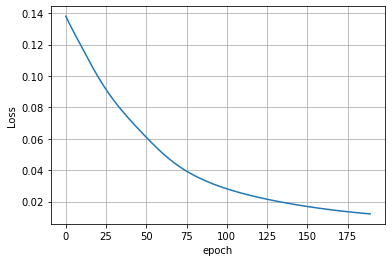

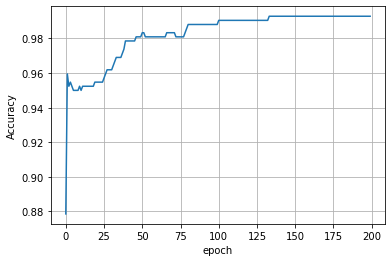

In [4]:
data_pred_labels = train(20, 200, 'SS')

In [6]:
print(data_pred_labels[70])

tensor([1, 1, 0, 0, 0, 0, 0, 0])


1. 作者这样，相当于构建了3个二分类器，破坏了label与label之间的关系，而且耗时耗力
2. 有个问题就是关于作者这样划分train valid test 数据集，但是使用的时候，完全没有发挥test的作用，都当作valid了。<br>
关于三者的区别，从网上查找了解到，train 用于前向传播与反向传播结合损失函数找到最适合的权重参数w，而valid主要用于<font color=red><b>model selection</font></b>模型的结构参数选择等等但是由于平时我们都要已经知道那种模型最好了，所以基本没有意义。test用于<font color=blue>评价模型的好坏。</font>
3. 关于多标签分类问题。目前有很多关于多标签的学习算法，依据解决问题的角度，这些算法可以分为两大类:一是基于问题转化的方法，二是基于算法适用的方法。基于问题转化的方法是转化问题数据，使之使用现有算法；基于算法适用的方法是指针对某一特定的算法进行扩展，从而能够处理多标记数据，改进算法，适用数据。<br>
<b>基于问题转化的方法</b><br>
考虑多标签的相关性时候可以将上一个输出的标签当成是下一个标签分类器的输入。在传统机器学习模型中可以使用`分类器链`<br>
标签powerset给训练集中的每一个可能的标签组合提供了一个独特的类。转化为单标签后就可以使用SVM、textCNN、textRNN等分类算法训练模型了。感觉Label Powerset只适合标签数少的数据，一旦标签数目太多(假设有n个)，使用Label Powerset后可能的数据集将分布在[0,2n-1]空间内，数据会很稀疏。<font color=red>这里适用</font><br>
<b>基于算法适用的方法</b><br>
改编算法来直接执行多标签分类，而不是将问题转化为不同的问题子集。在传统机器学习模型中穿件的多标签分类模型有:kNN多标签版本MLkNN，SVM的多标签版本Rank-SVM等。在深度学习中常常是修改多分类模型的输出层，使其适用于多标签的分类